In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
# Load dataset
df = pd.read_csv(r'C:/m.py/Boston.csv')

# Display the number of rows and columns in the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 506 rows and 14 columns.


In [4]:
# Check for missing values

print("\nMissing values in the dataset:")
print(df.isnull().sum())
#Handle missing values (if any)
# Example: Impute missing values with mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Assuming the numerical features to standardize (excluding 'MEDV')
numerical_features = df.columns[:-1]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display first few rows after standardization
print("\nFirst few rows after standardization:")
print(df.head())


Missing values in the dataset:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Descriptive statistics of the dataset:
               crim            zn         indus          chas           nox  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17 -1.965929e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 rm  

In [5]:
# Prepare data for modeling
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

In [6]:
# Prepare data for modeling
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}



Linear Regression Evaluation:
MSE: 24.40
RMSE: 4.94
R2 Score: 0.67


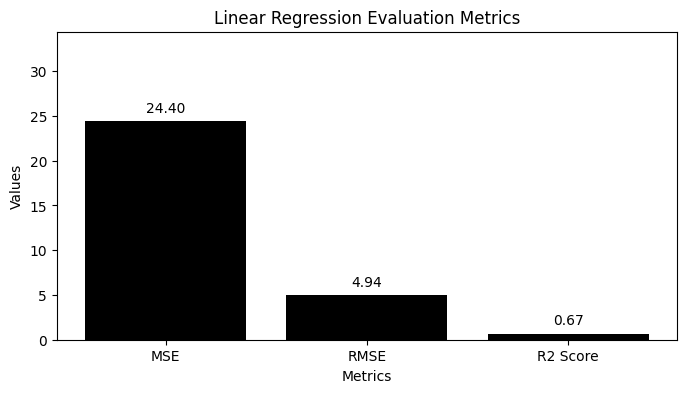


Decision Tree Evaluation:
MSE: 8.44
RMSE: 2.90
R2 Score: 0.88


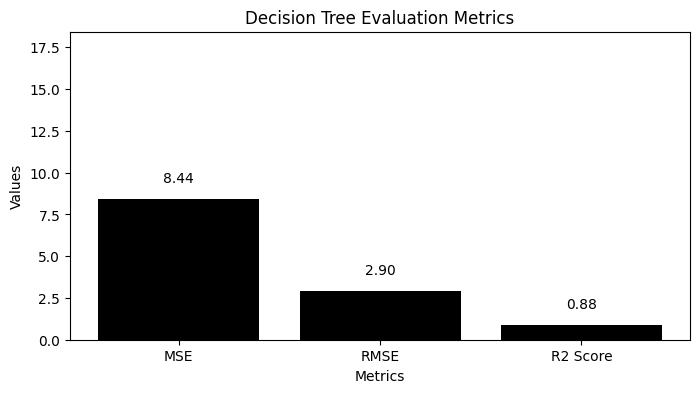


Random Forest Evaluation:
MSE: 8.88
RMSE: 2.98
R2 Score: 0.88


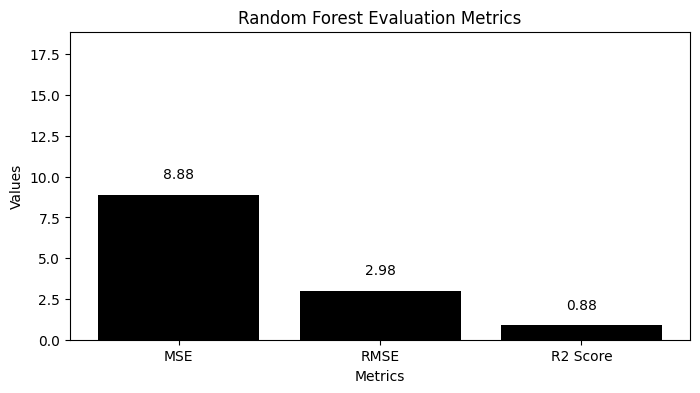


Support Vector Regression Evaluation:
MSE: 25.82
RMSE: 5.08
R2 Score: 0.65


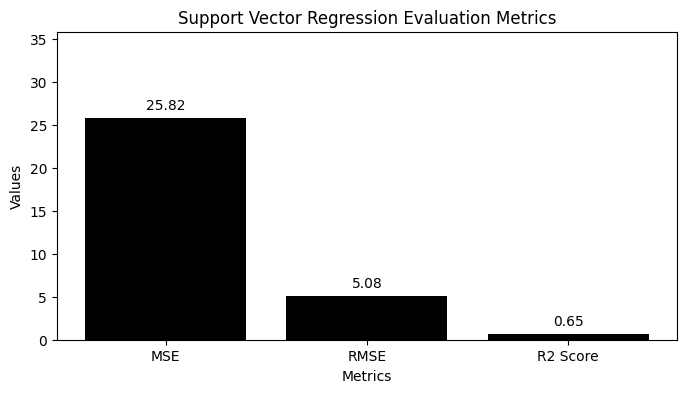

In [7]:
# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }
    
    print(f"\n{model_name} Evaluation:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    # Plot evaluation metrics for each model
    metrics = ['MSE', 'RMSE', 'R2 Score']
    values = [mse, rmse, r2]
    plt.figure(figsize=(8, 4))
    plt.bar(metrics, values, color='black')
    plt.title(f'{model_name} Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.ylim(0, max(values) + 10)
    for i, v in enumerate(values):
        plt.text(i, v + 1, f"{v:.2f}", ha='center')
    plt.savefig(f'{model_name}_evaluation_metrics.png')
    plt.show()


In [8]:
# Display results DataFrame
results_df = pd.DataFrame(results).T
print("\nResults Summary:")
print(results_df)


Results Summary:
                                 MSE      RMSE  R2 Score
Linear Regression          24.404825  4.940124  0.667209
Decision Tree               8.435294  2.904358  0.884974
Random Forest               8.882862  2.980413  0.878871
Support Vector Regression  25.816281  5.080972  0.647962


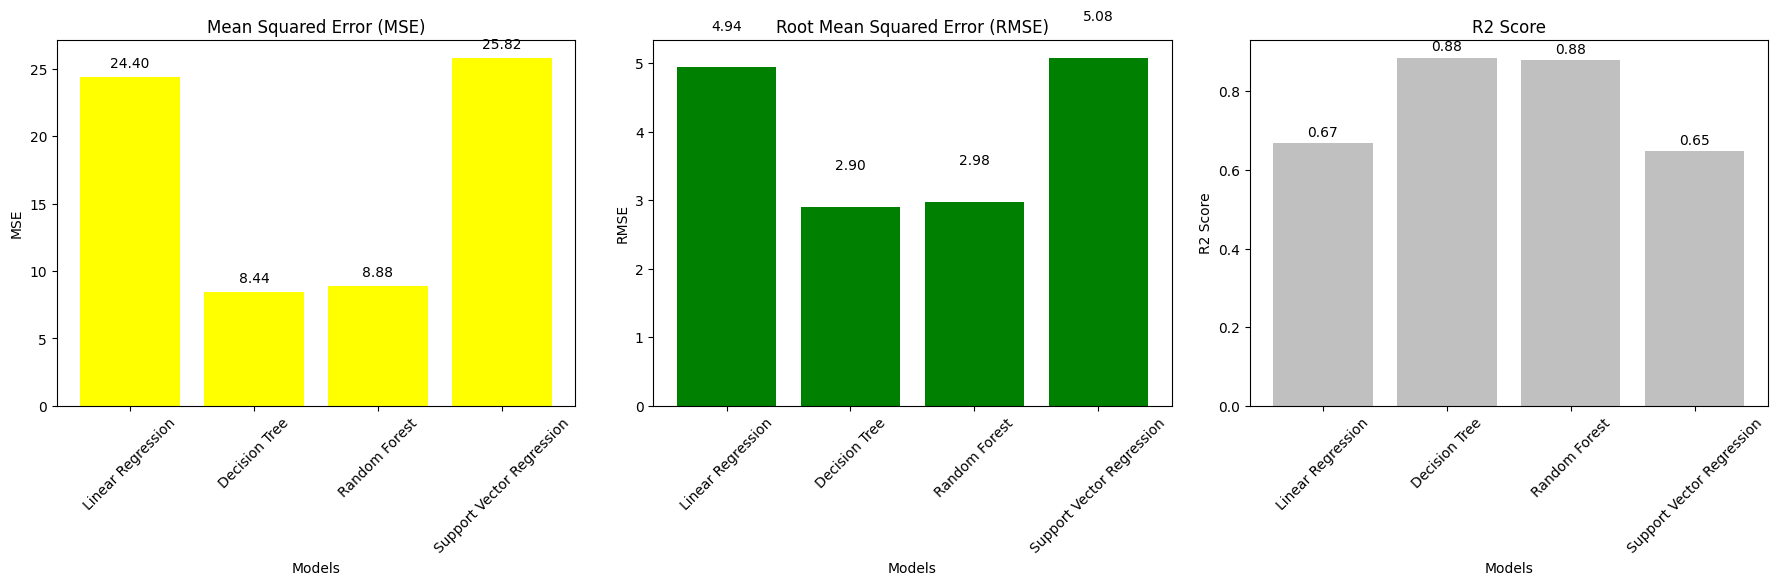

In [9]:
# Plot graphs for each evaluation metric
plt.figure(figsize=(18, 6))

# Plot MSE
plt.subplot(1, 3, 1)
plt.bar(results_df.index, results_df['MSE'], color='yellow')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['MSE']):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom')

# Plot RMSE
plt.subplot(1, 3, 2)
plt.bar(results_df.index, results_df['RMSE'], color='green')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['RMSE']):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom')

# Plot R2 Score
plt.subplot(1, 3, 3)
plt.bar(results_df.index, results_df['R2 Score'], color='silver')
plt.title('R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['R2 Score']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [10]:
# Determine the best model based on each metric with graphical representation
best_model_r2 = results_df['R2 Score'].idxmax()
best_model_mse = results_df['MSE'].idxmin()
best_model_rmse = results_df['RMSE'].idxmin()

print(f"\nThe best model based on R2 Score is: {best_model_r2} with R2 Score of {results_df.loc[best_model_r2, 'R2 Score']:.2f}")
print(f"The best model based on MSE is: {best_model_mse} with MSE of {results_df.loc[best_model_mse, 'MSE']:.2f}")
print(f"The best model based on RMSE is: {best_model_rmse} with RMSE of {results_df.loc[best_model_rmse, 'RMSE']:.2f}")



The best model based on R2 Score is: Decision Tree with R2 Score of 0.88
The best model based on MSE is: Decision Tree with MSE of 8.44
The best model based on RMSE is: Decision Tree with RMSE of 2.90
